In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

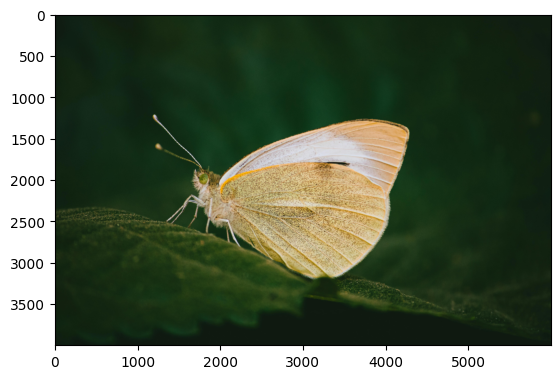

In [3]:
img = cv2.cvtColor(cv2.imread('rose.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [4]:
img.shape

(4000, 6000, 3)

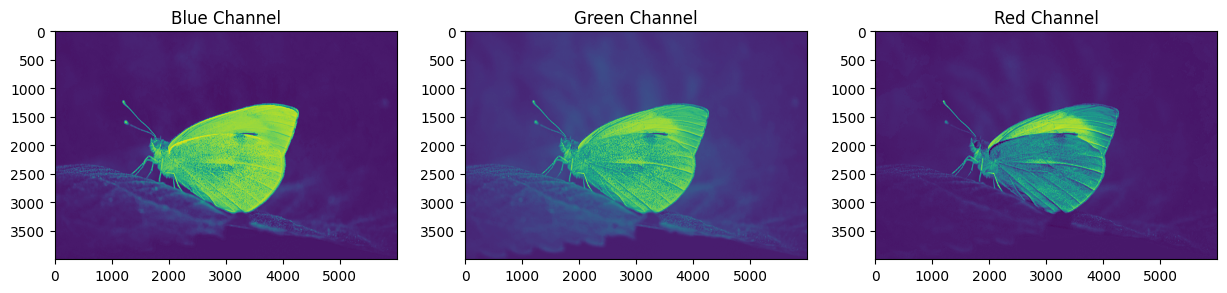

In [5]:
#Splitting into channels
blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2))
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [6]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,15,15,15,15,15,15,15,15,15,15,...,15,15,18,18,17,17,16,16,15,15
1,15,15,15,15,15,15,15,15,15,15,...,15,15,17,17,17,17,16,16,16,16
2,15,15,15,15,15,15,15,15,15,15,...,15,15,16,16,16,16,17,17,17,17
3,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,16,16,17,17,18,18
4,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,16,16,17,17,18,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,14,14,14,14,14,14,14,14,13,14,...,16,16,16,16,16,16,16,16,16,16
3996,13,13,13,13,13,13,13,13,14,14,...,16,16,16,16,16,16,16,16,16,16
3997,13,13,13,13,13,13,13,13,15,15,...,16,16,16,16,16,16,16,16,16,16
3998,13,13,13,13,13,13,13,13,15,15,...,16,16,16,16,16,16,16,16,16,16


In [7]:
df_blue = blue/255
df_green = green/255
df_red = red/255

In [8]:
pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [9]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(4000, 50)
(4000, 50)
(4000, 50)


In [10]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.967381787173988
Green Channel: 0.940941473283398
Red Channel  : 0.9326038873983905


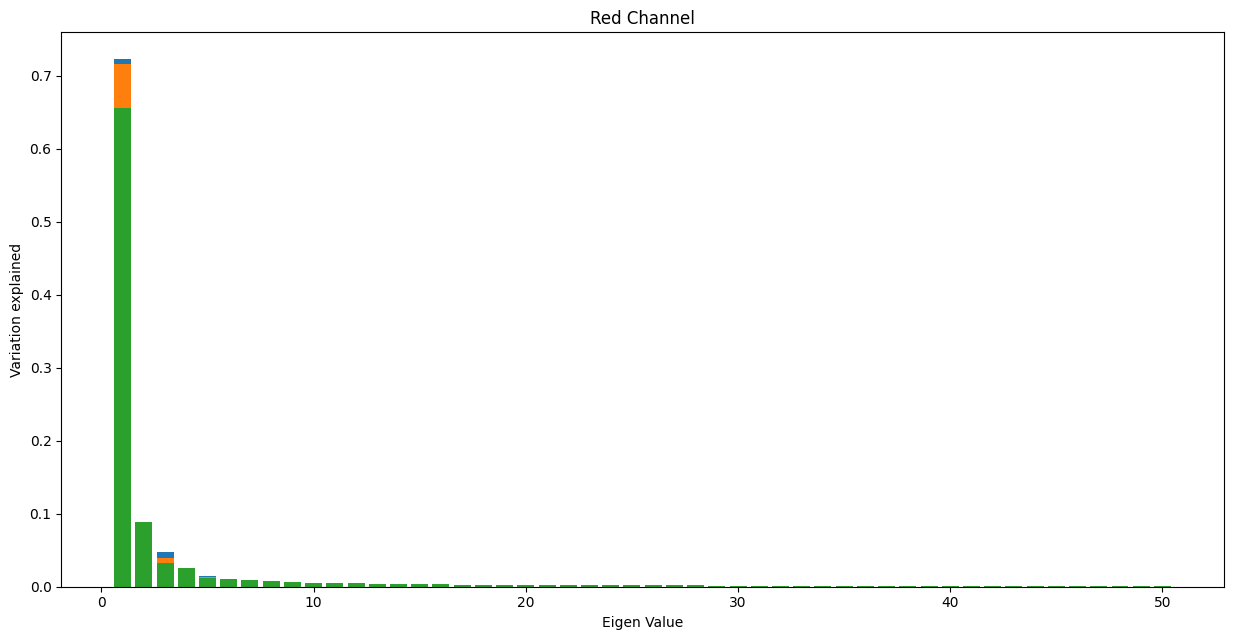

In [11]:
ig = plt.figure(figsize = (15, 7.2))
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_r.explained_variance_ratio_)
plt.show()

In [12]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(4000, 6000) (4000, 6000) (4000, 6000)


In [13]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(4000, 6000, 3)


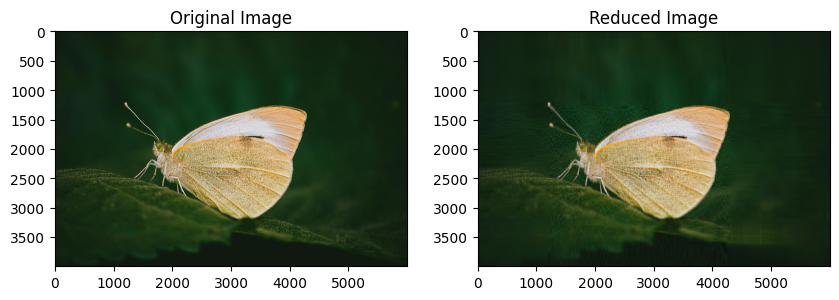

In [14]:
fig = plt.figure(figsize = (10, 7.2))
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()